Trabajar con datos categóricos para fines de aprendizaje automático (ML) a veces puede presentar problemas complicados. En última instancia, estas características deben codificarse numéricamente de alguna manera para que un algoritmo de ML pueda realmente trabajar con ellas.

También deberá considerar métodos adicionales para preparar sus características categóricas para el modelado. Por ejemplo, el rendimiento de su modelo puede beneficiarse de la clasificación de características categóricas . Esto significa básicamente agrupar varias categorías en una sola categoría. Al aplicar el conocimiento del dominio, puede ser capaz de diseñar nuevas categorías y características que representen mejor la estructura de sus datos.

En esta publicación, explicaremos brevemente por qué puede resultar beneficioso agrupar las características categóricas. Luego, repasaremos tres métodos diferentes para agrupar las características categóricas con ejemplos específicos utilizando NumPy y Pandas.

¿Por qué agrupar en categorias?

Con las características categóricas, puede encontrar problemas con etiquetas poco comunes , categorías o grupos que son extremadamente poco comunes dentro de su conjunto de datos. Este problema suele estar relacionado con características que tienen una cardinalidad alta ; en otras palabras, muchas categorías diferentes.

Tener demasiadas categorías, y especialmente categorías poco frecuentes, genera un conjunto de datos ruidoso. Puede resultar difícil para un algoritmo de aprendizaje automático eliminar este ruido y aprender de las señales más significativas de los datos.

Una cardinalidad alta también puede exacerbar la maldición de la dimensionalidad si eliges codificar en caliente tus características categóricas. Si la variable original tiene 50 categorías diferentes, básicamente estás agregando 49 columnas a tu conjunto de datos.

Tener demasiadas categorías también puede generar problemas al entrenar y probar el modelo. Es completamente posible que una categoría aparezca en el conjunto de prueba, pero no en el conjunto de entrenamiento. El modelo no tendría idea de cómo manejar esa categoría porque nunca la ha "visto" antes.

Una forma de abordar estos problemas es diseñar nuevas funciones que tengan menos categorías. Esto se puede lograr agrupando varias categorías en una sola.

En los siguientes ejemplos, exploraremos y diseñaremos características a partir de un conjunto de datos con información sobre la participación y la demografía de los votantes. He seleccionado tres variables categóricas con las que trabajar:

1. party_cd: afiliación a un partido político de un votante registrado
2. voting_method:cómo un votante registrado emitió su voto en las elecciones
3. birth_state: el estado o territorio de EE. UU. donde nació un votante registrado

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('UC_gen_2020',
                     dtype={'voting_method': str},
                     usecols=['party_cd',
                              'birth_state', 
                              'voting_method'])
df.head()

,voting_method,party_cd,birth_state
0,ABSENTEE ONESTOP,REP,NC
1,NaN,UNA,MA
2,ABSENTEE ONESTOP,DEM,MN
3,NaN,REP,NY
4,ABSENTEE ONESTOP,DEM,NC


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168070 entries, 0 to 168069
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   voting_method  131483 non-null  object
 1   party_cd       168070 non-null  object
 2   birth_state    127298 non-null  object
dtypes: object(3)
memory usage: 3.8+ MB


### Uso de np.where() para clasificar categorías

#### Primero, veamos por qué elegí party_cd. La imagen a continuación muestra cuántos votantes individuales pertenecen a cada partido político.

### Funciones Necesarias

In [7]:
def check_unique(col, df, dropna=False):

    unique_vals = pd.DataFrame()
    unique_vals['count'] = pd.Series(df[col].value_counts(dropna=dropna))
    unique_vals['%'] = pd.Series(round(df[col].value_counts(normalize=True, dropna=dropna)*100, 2))
    
    return unique_vals

In [8]:
def plot_count(variable, data, rotation=0, ha='center', figsize=(8,6)):
    
    plt.figure(figsize=figsize)
    ax = sns.countplot(x=data[variable],
                       order=data[variable].value_counts().index,
                       palette='nipy_spectral')
    
    ax.set_xticklabels(ax.get_xticklabels(),
                       rotation=rotation,
                       horizontalalignment=ha,
                       fontsize=12, weight='bold')
    ax.set_title(f'{variable.title()} Counts', 
                 fontsize=16,
                 weight='bold')
    ax.set_xlabel(f'{variable}',
                  fontsize=14,
                  weight='bold')
    ax.set_ylabel('Count', fontsize=14, weight='bold')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    return ax

#### Diagrama de recuento de Seaborn que muestra la distribución de votantes por partido político

C:\Users\REY\AppData\Local\Temp\ipykernel_27856\1416589310.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[variable],
C:\Users\REY\AppData\Local\Temp\ipykernel_27856\1416589310.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),


FileNotFoundError: [Errno 2] No such file or directory: 'Figures/blog_bin_cat_features/party_cd_count.png'

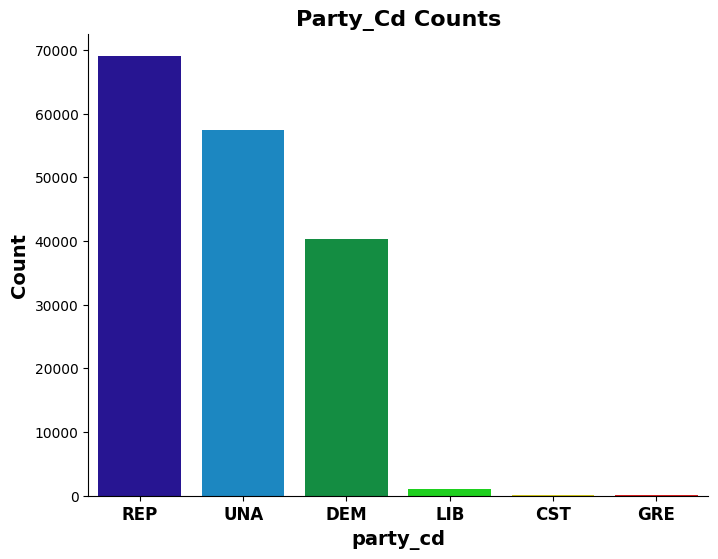

In [10]:
plot_count('party_cd', df)
plt.savefig('Figures/blog_bin_cat_features/party_cd_count', bbox_inches = "tight");

Hay tan pocos libertarios, constitucionalistas y miembros del Partido Verde registrados que apenas podemos verlos en el gráfico. Estos serían buenos ejemplos de etiquetas raras. Para los fines de esta publicación, definiremos las etiquetas raras como aquellas que representan menos del 5% de las observaciones. Este es un umbral común para definir etiquetas raras, pero en última instancia eso depende de su criterio.

Veamos un desglose de las cifras reales:

In [12]:
## Check distribution
# Recuento bruto y porcentaje de votantes registrados pertenecientes a cada partido 
check_unique('party_cd', df)

,count,%
party_cd,,
REP,69079,41.10
UNA,57488,34.20
DEM,40340,24.00
LIB,995,0.59
CST,96,0.06
GRE,72,0.04


Esas tres categorías representan cada una mucho menos del 5% de la población. Incluso si las agrupáramos todas en una sola categoría, esa nueva categoría seguiría representando menos del 1% de los votantes.

“REP” y “DEM” representan a los dos partidos políticos principales, mientras que “UNA” representa a los votantes que se registraron como no afiliados a un partido político. Por lo tanto, aquí podría tener sentido agrupar nuestras tres etiquetas poco comunes en ese grupo de no afiliados para que tengamos tres categorías: una para cada uno de los dos partidos principales y una tercera que represente a las personas que decidieron no alinearse con ninguno de los partidos principales.

Esto se puede lograr muy fácilmente con np.where()lo que toma 3 argumentos:

1. una condición
2. Qué devolver si se cumple la condición
3. Qué devolver si no se cumple la condición

El siguiente código crea una nueva característica, party_grp, a partir de la variable original party_cdusando np.where():

In [15]:
#NOTE -  Recuento bruto y porcentaje de votantes registrados pertenecientes a cada partido 

df['party_grp'] = np.where(df['party_cd'].isin(['REP', 'DEM']),
                           df['party_cd'].str.title(),
                           'Other')
## Check distribution
check_unique('party_grp', df)

,count,%
party_grp,,
Rep,69079,41.1
Other,58651,34.9
Dem,40340,24.0


C:\Users\REY\AppData\Local\Temp\ipykernel_27856\1416589310.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[variable],
C:\Users\REY\AppData\Local\Temp\ipykernel_27856\1416589310.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),


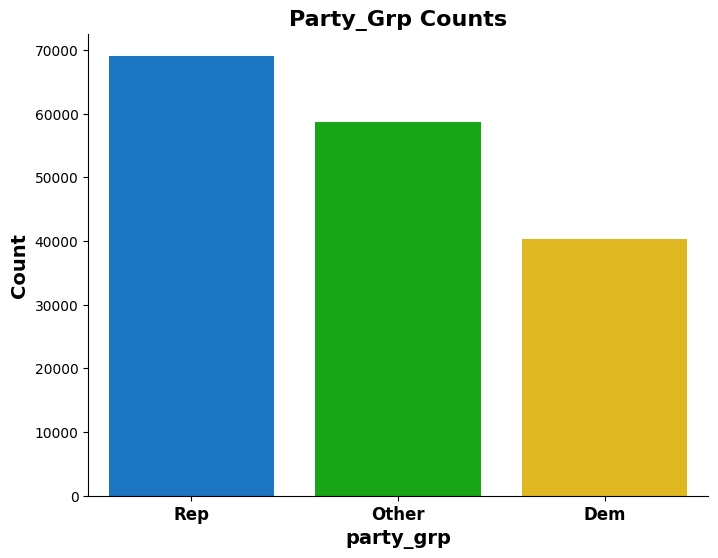

In [16]:
plot_count('party_grp', df);

### Asignación de categorías a nuevos grupos con map()

A continuación, echemos un vistazo a la distribución de voting_method:

C:\Users\REY\AppData\Local\Temp\ipykernel_27856\1416589310.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[variable],
C:\Users\REY\AppData\Local\Temp\ipykernel_27856\1416589310.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),


FileNotFoundError: [Errno 2] No such file or directory: 'Figures/blog_bin_cat_features/voting_method_count.png'

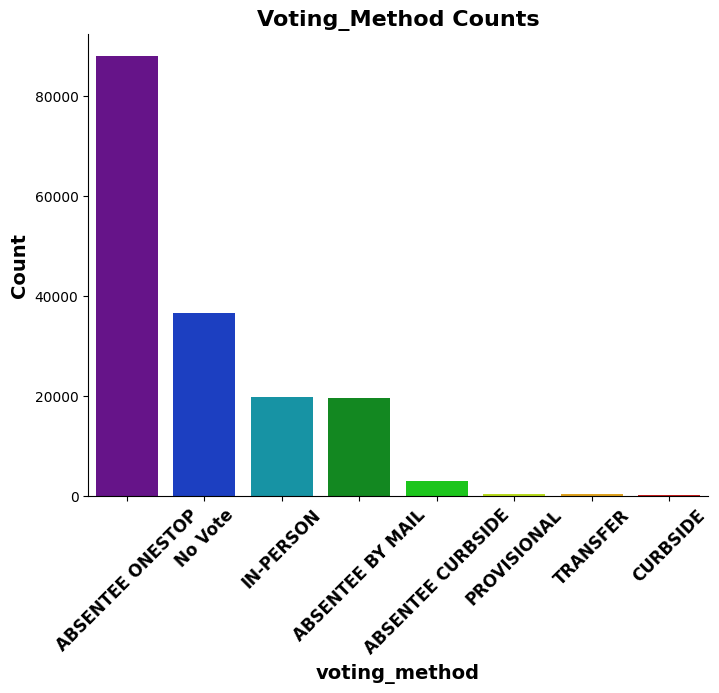

In [17]:
# Diagrama de recuento de Seaborn que muestra la distribución de votantes según el método de votación

plot_count('voting_method', df, rotation=45)
plt.savefig('Figures/blog_bin_cat_features/voting_method_count', bbox_inches = "tight");

No es el gráfico más bonito, pero nos hace una idea. Tenemos ocho categorías diferentes de métodos de votación. Me atrevería a decir que la mitad de ellas cumplen con nuestra definición de etiquetas poco comunes.

In [18]:
# Recuento bruto y porcentaje de votantes registrados que emitieron su voto mediante cada método
check_unique('voting_method', df)

,count,%
voting_method,,
ABSENTEE ONESTOP,88137,52.44
No Vote,36587,21.77
IN-PERSON,19813,11.79
ABSENTEE BY MAIL,19647,11.69
ABSENTEE CURBSIDE,2951,1.76
PROVISIONAL,380,0.23
TRANSFER,353,0.21
CURBSIDE,202,0.12


¡Sí! Cuatro de nuestras categorías son etiquetas poco comunes. Ahora podríamos agruparlas todas en una categoría llamada “Otros” y dar por finalizado el proceso, pero puede que no sea el método más adecuado.

Según la investigación que hice sobre cómo se codifican estos métodos, sé que “Ausente” significa que alguien votó de manera anticipada. Por lo tanto, podríamos agrupar cualquier método de “Ausente” en una categoría de “Anticipado”, agrupar “En persona” y “En la acera” en una categoría de “Día de las elecciones”, dejar “Sin voto” como su propia categoría y agrupar “Provisional” y “Transferencia” en una categoría de “Otros”.

El código siguiente logra esto definiendo primero un diccionario que utiliza las voting_methodcategorías originales como claves. El valor de cada clave es la nueva categoría que realmente queremos.

In [19]:
## Group original vote methods into more general categories in a new variable
 # Map the original categoriess to new ones
vote_method_map = {'ABSENTEE ONESTOP': 'Early',
                   'IN-PERSON': 'Election Day',
                   'ABSENTEE BY MAIL': 'Early',
                   'ABSENTEE CURBSIDE': 'Early',
                   'TRANSFER': 'Other',
                   'PROVISIONAL': 'Other',
                   'CURBSIDE': 'Election Day',
                   'No Vote': 'No Vote'}

# Apply the map to create new vote_method_cat column
df['vote_method_cat'] = df['voting_method'].map(vote_method_map)

In [20]:
# Recuento bruto y porcentaje de votantes registrados que emitieron su voto mediante cada método
check_unique('vote_method_cat', df)

,count,%
vote_method_cat,,
Early,110735,65.89
No Vote,36587,21.77
Election Day,20015,11.91
Other,733,0.44


Esa última línea crea una nueva columna, vote_method_cat, basada en los valores originales de la voting_methodcolumna. Para ello, aplica map()el método de Pandas a la columna original y envía nuestro vote_method_mappara traducir de la clave al valor correspondiente.

C:\Users\REY\AppData\Local\Temp\ipykernel_27856\1416589310.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[variable],
C:\Users\REY\AppData\Local\Temp\ipykernel_27856\1416589310.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),


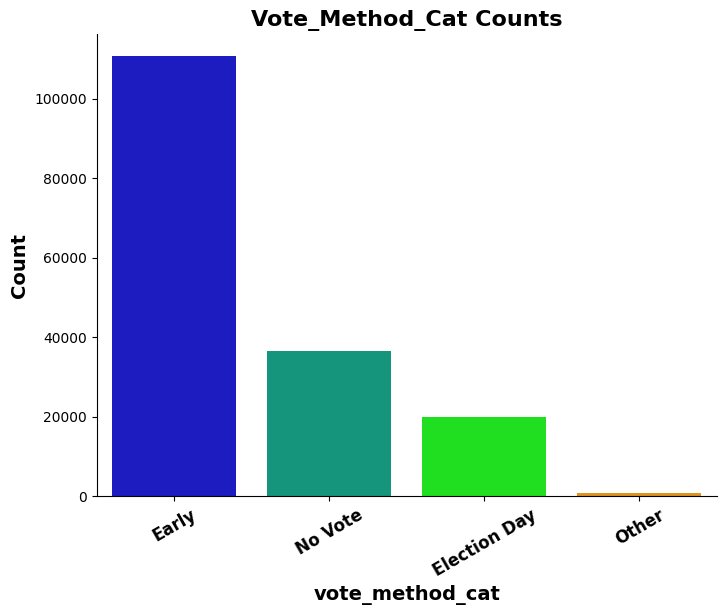

In [21]:
plot_count('vote_method_cat', df, rotation=30);

In [23]:
df['birth_state'].nunique()

56

Ahora nos hemos deshecho de todas nuestras etiquetas menos una. Finalmente, decidí eliminar esos 733 votos "Otros". El método de votación era en realidad la variable objetivo que estaba tratando de predecir y lo que realmente me interesaba era cómo la gente decidía votar. Las papeletas provisionales y de transferencia reflejan mejor el proceso y las regulaciones que rodean la votación, pero mi pregunta se refería específicamente a la elección activa de un votante.

De esta forma, no solo puede pensar en diseñar funciones predictivas para representar mejor la estructura subyacente de sus datos, sino que también puede considerar cuál es la mejor manera de representar su variable objetivo en relación con su pregunta específica.

### Cómo aplicar una función personalizada con apply()

Por último, vamos a trabajar en la clasificación birth_state. Esta variable tiene 57 categorías: una para cada estado, una para la información faltante, una para cada territorio de EE. UU. y una categoría final para las personas nacidas fuera de Estados Unidos.

Así que el gráfico parece cómicamente terrible:

C:\Users\REY\AppData\Local\Temp\ipykernel_27856\1416589310.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[variable],
C:\Users\REY\AppData\Local\Temp\ipykernel_27856\1416589310.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),


FileNotFoundError: [Errno 2] No such file or directory: 'Figures/blog_bin_cat_features/birth_state_count.png'

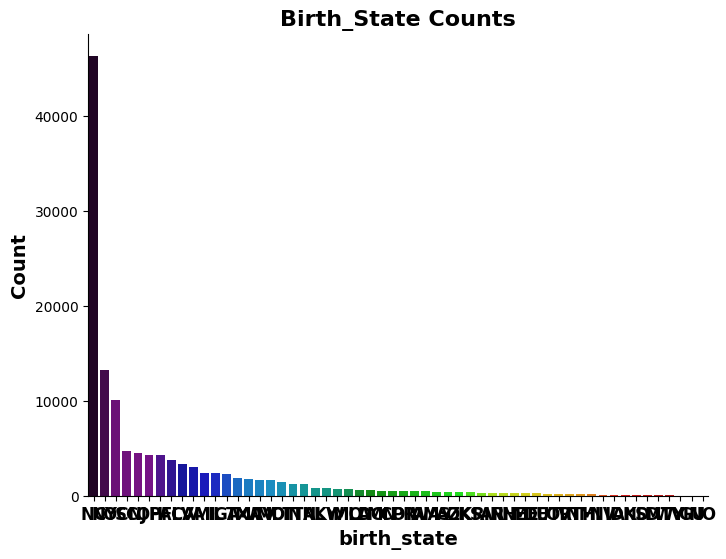

In [25]:
# Diagrama de recuento de Seaborn que muestra la distribución de los votantes según su lugar de nacimiento

plot_count('birth_state', df)
plt.savefig('Figures/blog_bin_cat_features/birth_state_count', bbox_inches = "tight");

Si alguna vez ve un gráfico como este mientras explora características categóricas, es una buena indicación de que debería considerar agrupar esa variable si pretende usarla como una característica en su modelo.

A continuación se muestra el desglose de las 15 categorías más comunes de birth_state:

In [26]:
# Recuento bruto y porcentaje de votantes registrados según lugar de nacimiento
check_unique('birth_state', df).head(15)

,count,%
birth_state,,
NC,46367,27.59
NaN,40772,24.26
NY,13211,7.86
OC,10042,5.97
SC,4753,2.83
NJ,4492,2.67
OH,4336,2.58
PA,4334,2.58
FL,3786,2.25


Carolina del Norte es el estado más común, lo que tiene sentido ya que estos datos corresponden a votantes de un condado específico de Carolina del Norte. Luego vemos muchos valores faltantes. Los neoyorquinos y las personas nacidas fuera de los EE. UU. también constituyen una parte considerable de la población. Las 53 categorías restantes son etiquetas poco comunes según nuestra definición e introducirán mucho ruido en nuestros esfuerzos de modelado.

Agruparemos los estados por región del censo de EE. UU. (Noreste, Sur, Medio Oeste, Oeste). También agruparemos a las personas nacidas en territorios de EE. UU. o fuera del país en un grupo "Otros" y dejaremos "Desaparecidos" como una categoría propia.

Para ello, definiremos nuestra propia función personalizada para traducir de estado a región y luego aplicaremos esa función a nuestra variable original para obtener nuestra nueva característica. Esta es una forma en la que podría escribir una función para verificar cada estado y devolver la región o categoría deseada:

In [28]:
## Define function for grouping birth state/country into categories
def get_birth_reg(state):
    
    # check if U.S. territory or out of country
    if state in ['AS', 'GU', 'MP', 'PR', 'VI', 'OC']:
        return 'Other'
    
    # the rest of the categories are based on U.S. Census Bureau regions
    elif state in ['CT', 'ME', 'MA', 'NH', 'RI', 'VT',
                     'NJ', 'NY', 'PA']:
        return 'Northeast'
    
    elif state in ['DE', 'FL', 'GA', 'MD', 'NC', 'SC', 'VA', 
                     'DC', 'WV', 'AL', 'KY', 'MS', 'TN', 'AR',
                     'LA', 'OK', 'TX']:
        return 'South'
    
    elif state in ['IL', 'IN', 'MI', 'OH', 'WI',
                     'IA', 'KS', 'MN', 'MO', 'NE', 'ND', 'SD']:
        return 'Midwest'
    
    elif state in ['AZ', 'CO', 'ID', 'MT', 'NV', 'NM', 'UT',
                     'WY', 'AK', 'CA', 'HI', 'OR', 'WA']:
        return 'West'
    
    else:
        return 'Missing'

Y ahora usemos apply()el método Pandas para crear nuestra nueva característica:

In [29]:
## Create a new column grouping birth_state into U.S. Census regions,
  ## this time lumping territories and out of country into 'Other'
df['birth_reg'] = df['birth_state'].apply(get_birth_reg)
check_unique('birth_reg', df)

,count,%
birth_reg,,
South,70810,42.13
Missing,40773,24.26
Northeast,26291,15.64
Midwest,13749,8.18
Other,10535,6.27
West,5912,3.52


¡Mucho mejor! Hemos pasado de un total de 57 categorías con 53 etiquetas raras a solo 6 categorías que aún tienen mucho significado y solo una de ellas cumple con nuestra definición de etiqueta rara. Podríamos considerar agruparlas más, pero ya entiendes la idea.



Para recapitular
Cubrimos:

- Qué significa descartar características categóricas
- Por qué y cuándo conviene eliminar las características categóricas
- 3 métodos para agrupar características categóricas ( np.where(), Pandas map(), función personalizada con Pandas apply())